In [139]:
from sklearn.datasets import load_wine, load_iris, load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import RidgeClassifier, LogisticRegression, LinearRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
import numpy as np

### Wine Data

In [2]:
wine_dataset = load_wine(as_frame=True)

In [3]:
df = pd.DataFrame(data=wine_dataset.data)
df['quality'] = pd.Series(wine_dataset.target)
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  quality  
0                          3.92   1065.0        0  
1                          3.40   1050.0        0  
2                          3.17   1185.0        0  
3                          3.45   1480.0        0  
4                          2.93    735.0        0

In [5]:
df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
quality                      -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
quality                                0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
quality                        -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [ ]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
quality                           int32
dtype: object

In [4]:
df.corr()["quality"]

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
quality                         1.000000
Name: quality, dtype: float64

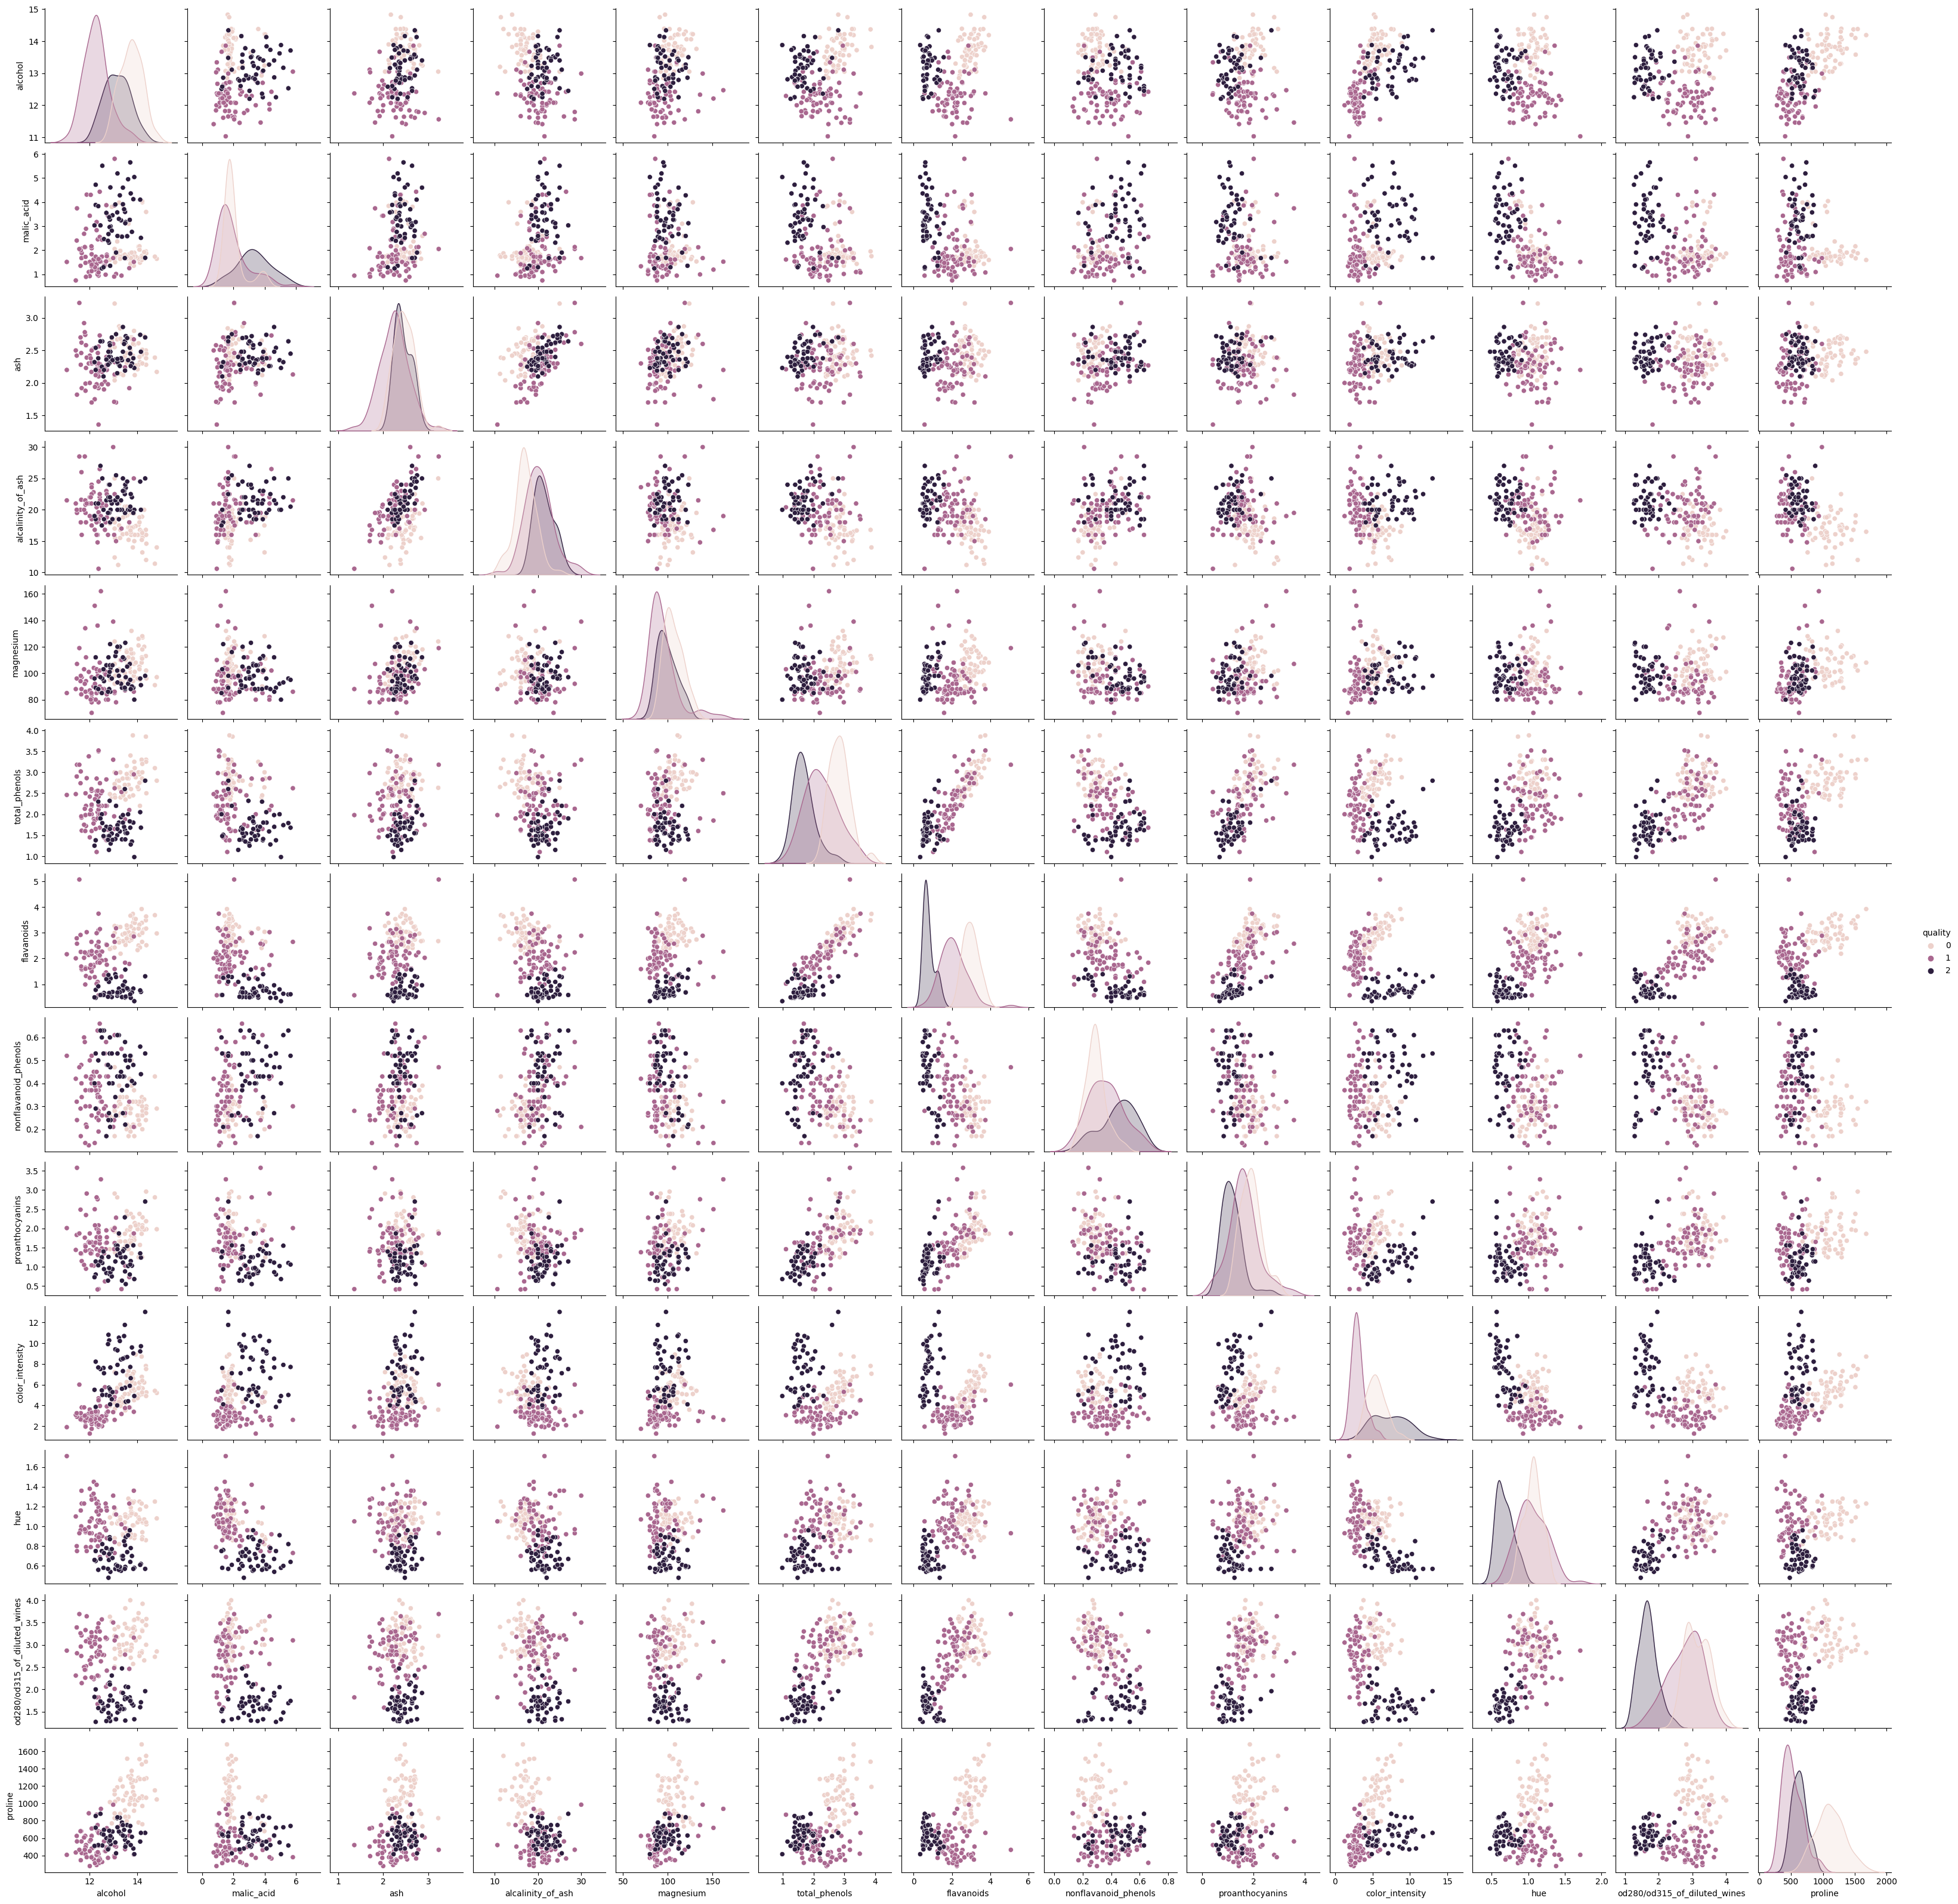

In [5]:
sns.pairplot(df, hue='quality')

In [167]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=42)
clf1 = OneVsRestClassifier(SVC(C=1, kernel='rbf')).fit(X, y)
clf2 = OneVsOneClassifier(
    LinearSVC(random_state=42)).fit(X_train, y_train)
clf3 = LogisticRegression(random_state=42).fit(X, y)

print(f' OneVsRestClassifier score is {clf1.score(X_test, y_test)}')
print(f' OneVsOneClassifier score is {clf2.score(X_test, y_test)}')
print(f' LogisticRegression score is {clf3.score(X_test, y_test)}')

 OneVsRestClassifier score is 0.711864406779661
 OneVsOneClassifier score is 0.7796610169491526
 LogisticRegression score is 0.9830508474576272


E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [54]:
clf1_y_pred = clf1.predict(X_test)
print('Accuracy Score 1:', accuracy_score(y_test, clf1_y_pred))
print('Classification Report:\n', classification_report(y_test, clf1_y_pred))

clf2_y_pred = clf2.predict(X_test)
print('Accuracy Score 2:', accuracy_score(y_test, clf2_y_pred))
print('Classification Report:\n', classification_report(y_test, clf2_y_pred))

clf3_y_pred = clf3.predict(X_test)
print('Accuracy Score 3:', accuracy_score(y_test, clf3_y_pred))
print('Classification Report:\n', classification_report(y_test, clf3_y_pred))


Accuracy Score 1: 0.711864406779661
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.65      0.92      0.76        24
           2       0.00      0.00      0.00        15

    accuracy                           0.71        59
   macro avg       0.48      0.64      0.55        59
weighted avg       0.53      0.71      0.61        59

Accuracy Score 2: 0.7796610169491526
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       0.74      0.83      0.78        24
           2       1.00      0.40      0.57        15

    accuracy                           0.78        59
   macro avg       0.84      0.74      0.74        59
weighted avg       0.82      0.78      0.76        59

Accuracy Score 3: 0.9830508474576272
Classification Report:
               precision    recall  f1-score   support

 

E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Iris

In [69]:
iris_dataset = load_iris(as_frame=True)
df = pd.DataFrame(data=iris_dataset.data)
df['result'] = pd.Series(iris_dataset.target)
df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   result  
0       0  
1       0  
2       0  
3       0  
4       0

In [166]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=42)
clf1 = OneVsRestClassifier(SVC()).fit(X, y)
clf2 = OneVsOneClassifier(
    LinearSVC(random_state=42)).fit(X_train, y_train)
clf3 = LogisticRegression(random_state=42).fit(X, y)

print(f' OneVsRestClassifier score is {clf1.score(X_test, y_test)}')
print(f' OneVsOneClassifier score is {clf2.score(X_test, y_test)}')
print(f' LogisticRegression score is {clf3.score(X_test, y_test)}')

 OneVsRestClassifier score is 0.98
 OneVsOneClassifier score is 0.98
 LogisticRegression score is 1.0


E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\SSD_E_old\python\goit-data\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
clf1_y_pred = clf1.predict(X_test)
print('Accuracy Score 1:', accuracy_score(y_test, clf1_y_pred))
print('Classification Report:\n', classification_report(y_test, clf1_y_pred))

clf2_y_pred = clf2.predict(X_test)
print('Accuracy Score 2:', accuracy_score(y_test, clf2_y_pred))
print('Classification Report:\n', classification_report(y_test, clf2_y_pred))

clf3_y_pred = clf3.predict(X_test)
print('Accuracy Score 3:', accuracy_score(y_test, clf3_y_pred))
print('Classification Report:\n', classification_report(y_test, clf3_y_pred))


Accuracy Score 1: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy Score 2: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy Score 3: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00

### Diabetes

In [135]:
diab_dataset = load_diabetes(as_frame=True)
df = pd.DataFrame(data=diab_dataset.data)
df['result'] = pd.Series(diab_dataset.target)
df.head(5)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  result  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

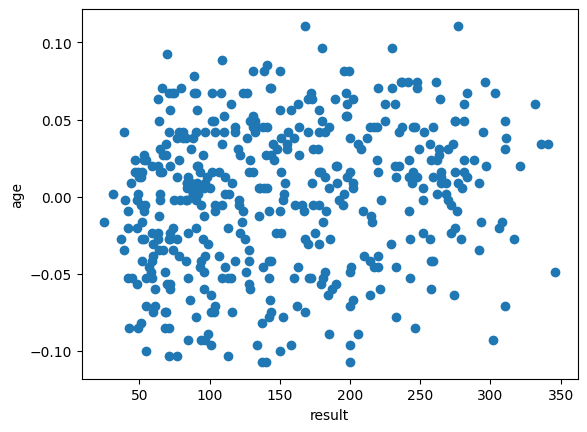

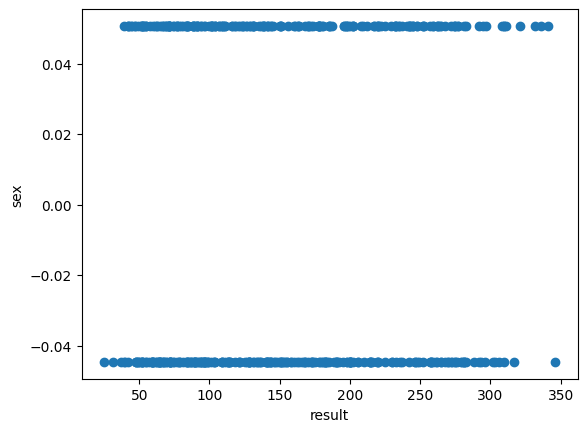

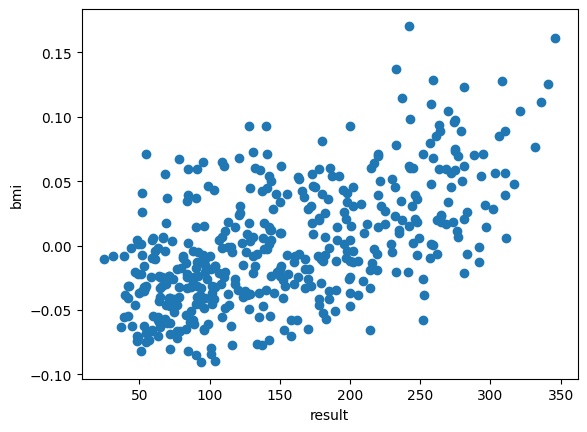

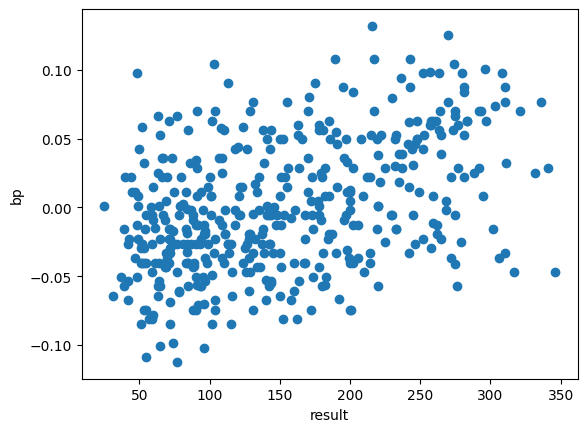

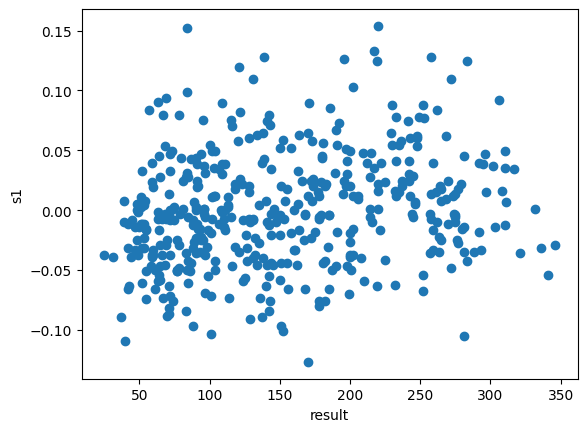

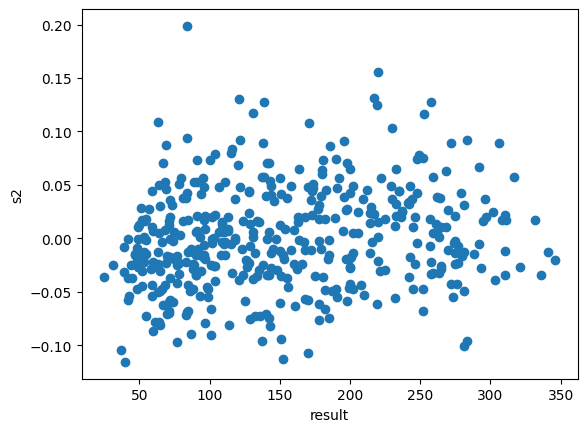

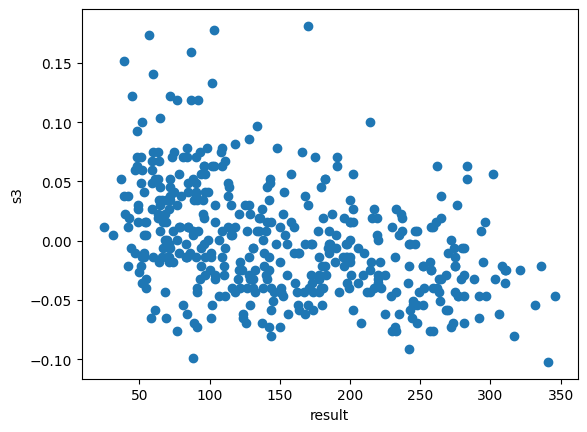

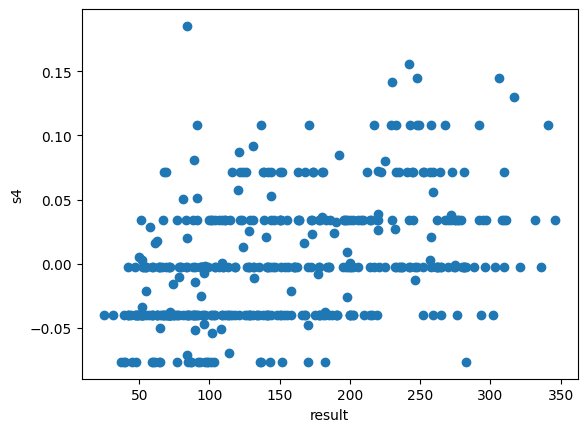

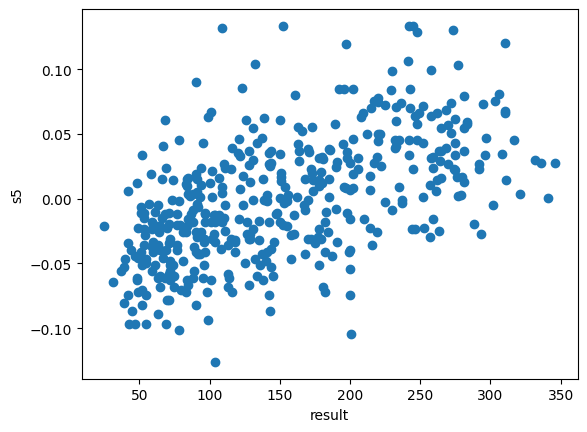

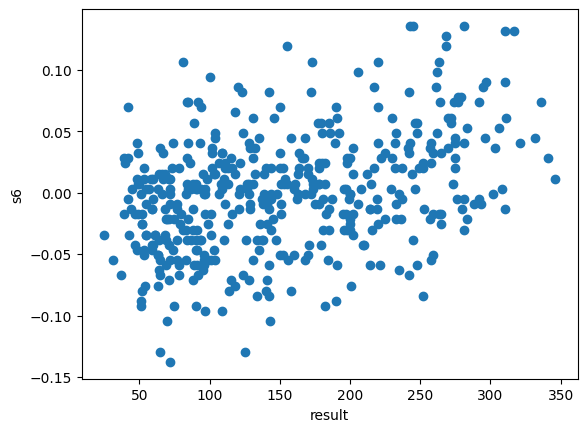

In [169]:
for i in df.columns[:-1]:
    plt.scatter(df["result"], df[i])
    plt.xlabel("result")
    plt.ylabel(i)
    plt.show()

In [75]:
df.corr()["result"]

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
result    1.000000
Name: result, dtype: float64

The score is 0.5129960936720845
R2: 0.5129960936720845
MSE: 2802.8340525835565
[-238.80827598  559.51152378  412.84353021 -727.23291116  408.30886405
   16.48978386  168.85023217  636.4901254   -17.6097696 ]


C:\Users\dgoub\AppData\Local\Temp\ipykernel_13384\1013371620.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, kde = True)
C:\Users\dgoub\AppData\Local\Temp\ipykernel_13384\1013371620.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = F

<AxesSubplot: ylabel='Density'>

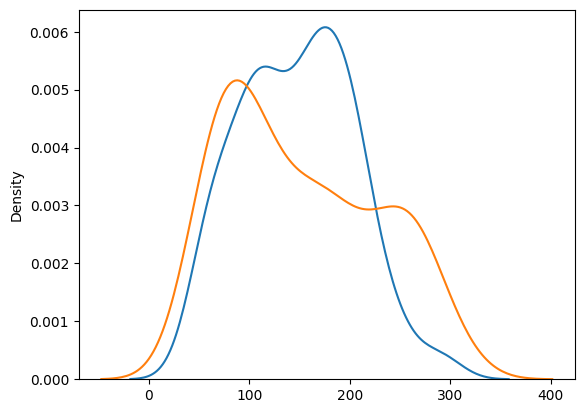

In [174]:
X, y = load_diabetes(return_X_y=True)

#delete not correlated column
X = np.delete(X, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=42)
regressor = LinearRegression().fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f'The score is {regressor.score(X_test, y_test)}')
print(f"R2: {r2_score(y_test ,y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

coef = regressor.coef_
print(coef)
sns.distplot(y_pred, hist = False, kde = True)
sns.distplot(y_test, hist = False, kde = True)